<a href="https://colab.research.google.com/github/GARYTJ29/ML-projects-FastAPI-deployment-/blob/main/Project_3_(Traffic_Sign_classification_CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traffic Signs Classification

Using Convolutional Neural Network to build train and test a traffic sign classification model. We will build this model using tensorflow and keras. It is a multiclass classification problem. This model can be used to make smarter cars.

In [ ]:
#Upload Kaggle json file
from google.colab import files
files.upload()

In [2]:
# installing the Kaggle API client. And downloading required Dataset
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

# Creating directory and changing the current working directory
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

# Downloading dataset and coming out of directory
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

/content/traffic_sign_dataset
Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 96% 585M/612M [00:06<00:00, 133MB/s]
100% 612M/612M [00:06<00:00, 105MB/s]
/content


In [3]:
# Unzipping downloaded file and removing unusable file
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv
!rm traffic_sign_dataset/Test/GT-final_test.csv

In [4]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

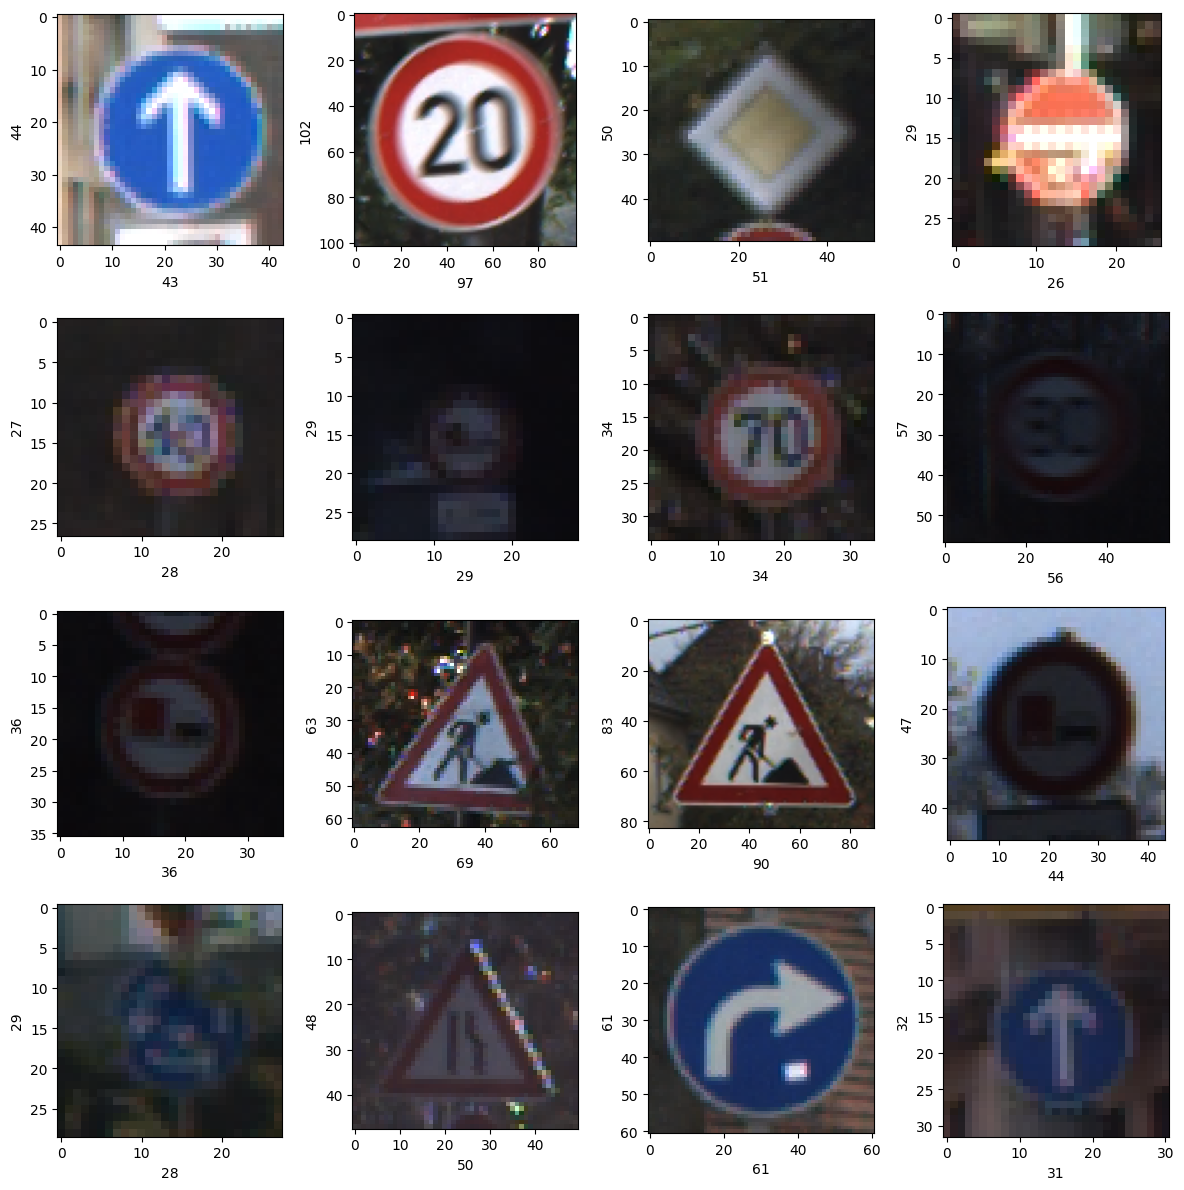

In [5]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [6]:
# As size of images are different we have to make them equal so we will take mean of dimensions
dim1 = []
dim2 = []

for i in range(0,43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

In [7]:
#Printing mean dimension of images
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  50.328929582493814  Dimension 2 Mean :  50.83587951745773


In [8]:
# Reshaping the images to (50,50)
images = []
label_id = []

for i in range(43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)

In [9]:
#Converting images into numpy array
images = np.array(images)
#The pixel value of each image ranges between 0 and 255
#Dividing each image by 255 will scale the values between 0 and 1 for normalization.
images = images/255

In [10]:
label_id = np.array(label_id)

In [11]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head(6)

2     2250
1     2220
13    2160
12    2100
38    2070
10    2010
Name: count, dtype: int64

In [12]:
#Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

In [13]:
#keras has a built-in function for one-hot encoding.
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

## Model

In [14]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

In [15]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [16]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/10
246/246 - 13s - loss: 2.4752 - accuracy: 0.3261 - val_loss: 1.2434 - val_accuracy: 0.6903 - 13s/epoch - 51ms/step
Epoch 2/10
246/246 - 5s - loss: 1.1099 - accuracy: 0.6507 - val_loss: 0.4331 - val_accuracy: 0.9098 - 5s/epoch - 20ms/step
Epoch 3/10
246/246 - 5s - loss: 0.7148 - accuracy: 0.7709 - val_loss: 0.2549 - val_accuracy: 0.9560 - 5s/epoch - 18ms/step
Epoch 4/10
246/246 - 5s - loss: 0.5574 - accuracy: 0.8228 - val_loss: 0.1871 - val_accuracy: 0.9668 - 5s/epoch - 20ms/step
Epoch 5/10
246/246 - 5s - loss: 0.4660 - accuracy: 0.8515 - val_loss: 0.1329 - val_accuracy: 0.9762 - 5s/epoch - 18ms/step
Epoch 6/10
246/246 - 5s - loss: 0.4100 - accuracy: 0.8687 - val_loss: 0.1027 - val_accuracy: 0.9811 - 5s/epoch - 20ms/step
Epoch 7/10
246/246 - 5s - loss: 0.3665 - accuracy: 0.8822 - val_loss: 0.0915 - val_accuracy: 0.9833 - 5s/epoch - 20ms/step
Epoch 8/10
246/246 - 5s - loss: 0.3370 - accuracy: 0.8890 - val_loss: 0.0857 - val_accuracy: 0.9843 - 5s/epoch - 20ms/step
Epoch 9/10
246

<Axes: >

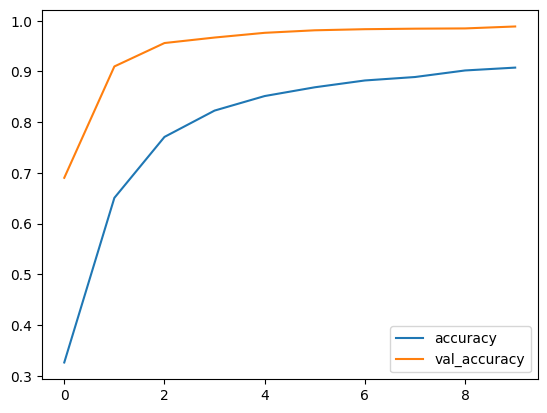

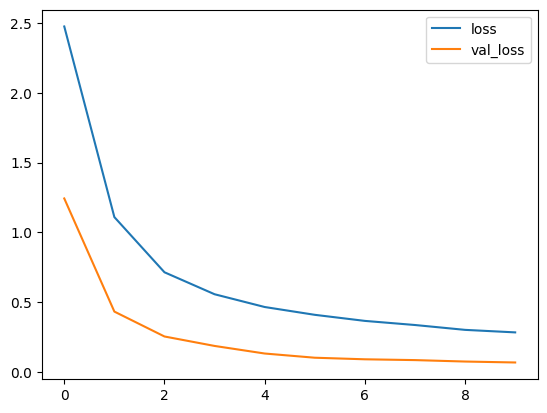

In [17]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [18]:
test_path = 'traffic_sign_dataset/Test'

In [19]:
#defining a function that will scale images
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images

    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

In [20]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)

In [21]:
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [23]:
y_pred = np.argmax(model.predict(test_images), axis=-1)
y_pred

395/395 [==============================] - 2s 4ms/step


array([16,  1, 38, ..., 38,  7, 10])

In [24]:
# Storing all lables
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

Original label :  Speed limit (30km/h)
Predicted label :  Speed limit (30km/h)


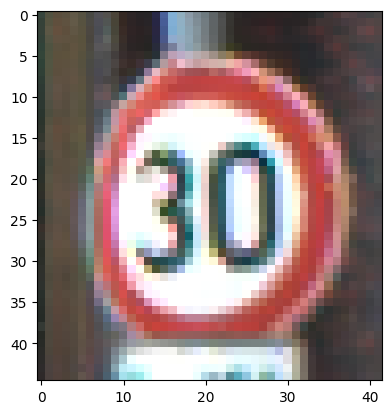

In [25]:
# Testing predictions
img = Image.open(test_path + '/00001.png')
# Original label
print("Original label : ",all_lables[y_test[1]])
# Predicted label
print("Predicted label : ",all_lables[y_pred[1]])
# Original image
plt.imshow(img)
plt.show()

In [40]:
%cd /content/

/content


In [33]:
model.save('Traffic_model.keras')

# Fast API implementaion

In [41]:
%cd /content/

/content


In [ ]:
!pip install fastapi uvicorn

In [47]:
# Python script to write the FastAPI code into app.py
fastapi_code = '''\
from fastapi import FastAPI, File, UploadFile
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import io

# All labels
all_labels = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

# Load the Keras model
model = load_model('Traffic_model.keras')

# Initialize FastAPI
app = FastAPI()

@app.post("/predict")
async def predict(file: UploadFile = File(...)):
    # Read the image file
    image_data = await file.read()
    image = Image.open(io.BytesIO(image_data)).convert('RGB')

    # Preprocess the image
    image = image.resize((50, 50))
    image_array = np.array(image) / 255.0  # Normalize
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(image_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    predicted_label = all_labels[predicted_class]

    # Return the prediction as JSON
    return {"prediction": predicted_label}
'''

# Write the FastAPI code to app.py
with open('/content/app.py', 'w') as file:
    file.write(fastapi_code)


In [44]:
from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(8000)") + "docs")

https://nux6xc016bb-496ff2e9c6d22116-8000-colab.googleusercontent.com/docs


In [48]:
!uvicorn app:app --reload

INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [6160] using WatchFiles
2024-07-10 16:25:13.568007: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-10 16:25:13.568062: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-10 16:25:13.569624: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-10 16:25:14.729095: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-07-10 16:25:16.801330: W tensorflow